# 待提取的特征
- 现金流的稳健性
- 上下游
    + 客户关系稳健性
    + 现金流的稳健性
- 不同等级的税率

In [10]:
import pandas as pd

In [11]:
df = [] 

In [12]:
for i in range(3):
    df.append(pd.read_excel('../data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name=i))

In [13]:
df[0]

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否
...,...,...,...,...
118,E119,***药房,D,是
119,E120,***陈列广告有限公司,D,是
120,E121,***药业连锁有限公司***药店,D,是
121,E122,***商贸有限责任公司,D,是


In [14]:
df[1]

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票


In [15]:
df[2]

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...,...
162479,E123,8887701,2019-12-17,B10944,4827.67,144.83,4972.5,有效发票
162480,E123,8887702,2019-12-17,B10944,7412.62,222.38,7635.0,有效发票
162481,E123,34173085,2019-12-17,B13093,1917.47,57.53,1975.0,有效发票
162482,E123,8887703,2019-12-25,B13093,7252.42,217.58,7470.0,有效发票


# 不同公司是否因为经营业务的不同而税率不同

In [16]:
set([round(x,2) for x in df[1]['税额']/df[1]['金额']])

{-0.03,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.2,
 0.25,
 0.33}

**存在作废发票**

In [17]:
df[2][df[2]['金额'] == 0.0]

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
8901,E2,83885,2017-06-08,B00003,0.0,0.0,0.0,作废发票
9617,E2,490000,2017-08-30,B00002,0.0,0.0,0.0,作废发票
12148,E2,2852330,2018-06-14,B00003,0.0,0.0,0.0,作废发票
12448,E2,22985673,2018-07-16,B00002,0.0,0.0,0.0,作废发票
18576,E2,3323835,2019-10-29,B00003,0.0,0.0,0.0,作废发票
...,...,...,...,...,...,...,...,...
162464,E123,3468703,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162465,E123,3468704,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162466,E123,3468705,2018-11-27,B00003,0.0,0.0,0.0,作废发票
162467,E123,3468706,2018-11-27,B00003,0.0,0.0,0.0,作废发票


In [18]:
set([round(x,2) for x in df[2]['税额']/df[2]['金额'] if not pd.isna(x)])

{-0.1,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18}

In [20]:
def get_one_ratio(code,df):
    df_E1_buy  = df[1][df[1]['企业代号'] == code]
    df_E1_sell  = df[2][df[2]['企业代号'] == code]
    buy_total = df_E1_buy['金额'].sum() + 1
    ratio1 = df_E1_buy[df_E1_buy['税额']/df_E1_buy['金额'] < 0.05]['金额'].sum() / buy_total
    ratio2 = df_E1_buy[(df_E1_buy['税额']/df_E1_buy['金额'] >= 0.05)&(df_E1_buy['税额']/df_E1_buy['金额'] < 0.1)]['金额'].sum() / buy_total
    ratio3 = df_E1_buy[df_E1_buy['税额']/df_E1_buy['金额'] >= 0.15]['金额'].sum() / buy_total
    ratio4 = df_E1_buy[(df_E1_buy['税额']/df_E1_buy['金额'] >= 0.1)&(df_E1_buy['税额']/df_E1_buy['金额'] < 0.15)]['金额'].sum() / buy_total
    return {'第1档税率比例':ratio1,'第2档税率比例':ratio2,'第3档税率比例':ratio3,'第4档税率比例':ratio4}
get_one_ratio('E1',df)

{'第1档税率比例': 0.00030162261070418295,
 '第2档税率比例': 0.0004047549289103001,
 '第3档税率比例': 0.746664154813076,
 '第4档税率比例': 0.2526294674796375}

# 共有123个公司,分析第一个公司的进项销项发票,来分析现金流

## 分析E1每日现金流

In [21]:
df_E1_buy  = df[1][df[1]['企业代号'] == 'E1']
df_E1_buy

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票
...,...,...,...,...,...,...,...,...
3436,E1,48502381,2020-01-23,A10049,683.96,41.04,725.00,有效发票
3437,E1,78121064,2020-01-27,A03850,2894.34,173.66,3068.00,有效发票
3438,E1,49393086,2020-01-31,A06506,3656.64,475.36,4132.00,有效发票
3439,E1,36460836,2020-02-02,A00370,336.29,43.71,380.00,有效发票


In [22]:
df_E1_sell  = df[2][df[2]['企业代号'] == 'E1']
df_E1_sell

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.00,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票
...,...,...,...,...,...,...,...,...
8105,E1,716822,2020-01-17,B03516,817063.72,106218.28,923282.00,有效发票
8106,E1,716823,2020-01-17,B03516,964453.98,125379.02,1089833.00,有效发票
8107,E1,716824,2020-01-17,B03516,802566.37,104333.63,906900.00,有效发票
8108,E1,716825,2020-01-17,B03516,222043.36,28865.64,250909.00,有效发票


In [23]:
start_date = '2017-07-18'
end_date= '2020-02-14'

In [24]:
df_E1_sell[df_E1_sell['开票日期']=='2017-08-09']['价税合计'].sum()-df_E1_buy[df_E1_buy['开票日期']=='2017-08-09']['价税合计'].sum()

-15800.0

In [25]:
day_delta = pd.to_datetime(end_date)-pd.to_datetime(start_date)
day_delta

Timedelta('941 days 00:00:00')

In [26]:
pd.to_datetime(start_date)+day_delta

Timestamp('2020-02-14 00:00:00')

In [27]:
from datetime import datetime,timedelta

In [28]:
timedelta(2)

datetime.timedelta(days=2)

In [29]:
pd.to_datetime(start_date)+timedelta(2)

Timestamp('2017-07-20 00:00:00')

In [30]:
test_date = pd.to_datetime(start_date)

In [31]:
test_date.strftime('%Y-%m-%d')

'2017-07-18'

In [32]:
date_list = list(set(df_E1_sell['开票日期']).union(set(df_E1_buy['开票日期'])))
date_list.sort()
start_date = date_list[0]
date_range = date_list[-1] - date_list[0]
int(str(date_range).split(' ')[0])

941

In [33]:

money_flow_df_list =[] 
for i in range(1,942):
    date = (pd.to_datetime(start_date)+timedelta(i)).strftime('%Y-%m-%d')
    value = df_E1_sell[df_E1_sell['开票日期']==date]['价税合计'].sum()-df_E1_buy[df_E1_buy['开票日期']==date]['价税合计'].sum()
    money_flow_df_list.append({'date':date,'money_change':value})
money_flow_df = pd.DataFrame(money_flow_df_list)
money_flow_df

,date,money_change
0,2017-07-19,0.0
1,2017-07-20,0.0
2,2017-07-21,0.0
3,2017-07-22,0.0
4,2017-07-23,0.0
...,...,...
936,2020-02-10,0.0
937,2020-02-11,0.0
938,2020-02-12,0.0
939,2020-02-13,0.0


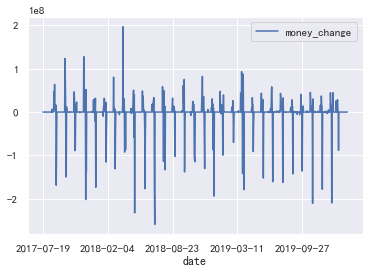

In [34]:
def get_one_money_flow(code,df):
    df_E1_buy  = df[1][df[1]['企业代号'] == code]
    df_E1_sell  = df[2][df[2]['企业代号'] == code]
    date_list = list(set(df_E1_sell['开票日期']).union(set(df_E1_buy['开票日期'])))
    date_list.sort()
    start_date = date_list[0]
    date_range = date_list[-1] - date_list[0]
    date_range = int(str(date_range).split(' ')[0])
    money_flow_df_list =[] 
    for i in range(1,date_range):
        date = (start_date+timedelta(i)).strftime('%Y-%m-%d')
        value = df_E1_sell[df_E1_sell['开票日期']==date]['价税合计'].sum()-df_E1_buy[df_E1_buy['开票日期']==date]['价税合计'].sum()
        money_flow_df_list.append({'date':date,'money_change':value})
    money_flow_df = pd.DataFrame(money_flow_df_list)
    money_flow_df.index = money_flow_df['date']
    return money_flow_df
get_one_money_flow('E1',df).plot()

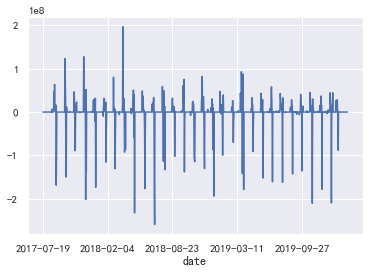

In [35]:
money_flow_df.index = money_flow_df['date']
money_flow_df['money_change'].plot()

## 计算每月E1的利润（营业收入-成本-增值税）

如果当月销项税额-进项税额$\le$0，则不需要缴纳增值税

In [36]:
sell_month = [date.strftime('%Y-%m') for date in df_E1_sell['开票日期']]
df_E1_sell.loc[:, '开票月份'] = sell_month
buy_month = [date.strftime('%Y-%m') for date in df_E1_buy['开票日期']]
df_E1_buy.loc[:, '开票月份'] = buy_month

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
df_E1_sell

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,开票月份
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.00,有效发票,2017-08
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票,2017-08
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.00,有效发票,2017-08
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票,2017-08
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.00,有效发票,2017-08
...,...,...,...,...,...,...,...,...,...
8105,E1,716822,2020-01-17,B03516,817063.72,106218.28,923282.00,有效发票,2020-01
8106,E1,716823,2020-01-17,B03516,964453.98,125379.02,1089833.00,有效发票,2020-01
8107,E1,716824,2020-01-17,B03516,802566.37,104333.63,906900.00,有效发票,2020-01
8108,E1,716825,2020-01-17,B03516,222043.36,28865.64,250909.00,有效发票,2020-01


In [38]:
# 销项
df_E1_monthly_sell = df_E1_sell.groupby('开票月份').sum()[['金额', '税额', '价税合计']]
df_E1_monthly_sell.columns = ['销售金额', '销项税额', '销售价税合计']
# 进项
df_E1_monthly_buy = df_E1_buy.groupby('开票月份').sum()[['金额', '税额', '价税合计']]
df_E1_monthly_buy.columns  = ['购买金额', '进项税额', '购买价税合计']

In [39]:
df_E1_monthly_buy

,购买金额,进项税额,购买价税合计
开票月份,,,
2017-07,0.000000e+00,0.00,0.000000e+00
2017-08,2.383860e+08,40516776.01,2.789028e+08
2017-09,2.537457e+08,43111063.96,2.968568e+08
2017-10,1.705131e+08,28964633.63,1.994778e+08
2017-11,2.581708e+08,43863405.69,3.020342e+08
2017-12,1.657974e+08,28065578.84,1.938629e+08
2018-01,1.250213e+08,21247414.01,1.462687e+08
2018-02,1.563595e+08,26578614.50,1.829382e+08
2018-03,2.488052e+08,42294093.11,2.910993e+08


In [40]:
money_flow_monthly_df = pd.concat([df_E1_monthly_buy, df_E1_monthly_sell], axis = 1).dropna()

In [41]:
money_flow_monthly_df

,购买金额,进项税额,购买价税合计,销售金额,销项税额,销售价税合计
2017-08,2.383860e+08,40516776.01,2.789028e+08,1.688766e+08,28709027.42,1.975857e+08
2017-09,2.537457e+08,43111063.96,2.968568e+08,2.429125e+08,41295121.56,2.842076e+08
2017-10,1.705131e+08,28964633.63,1.994778e+08,1.420132e+08,24142237.48,1.661554e+08
2017-11,2.581708e+08,43863405.69,3.020342e+08,1.979691e+08,33654745.81,2.316238e+08
2017-12,1.657974e+08,28065578.84,1.938629e+08,8.341307e+07,14180222.13,9.759330e+07
2018-01,1.250213e+08,21247414.01,1.462687e+08,8.863700e+07,15068291.04,1.037053e+08
2018-02,1.563595e+08,26578614.50,1.829382e+08,9.027313e+07,15346432.91,1.056196e+08
2018-03,2.488052e+08,42294093.11,2.910993e+08,2.437913e+08,41444520.43,2.852358e+08
2018-04,2.599724e+08,44185319.33,3.041577e+08,1.579979e+08,26859638.76,1.848575e+08
2018-05,3.512231e+08,57559809.30,4.087829e+08,2.054855e+08,33206920.30,2.386924e+08


In [42]:
# 计算增值税
vat = money_flow_monthly_df['销项税额'] - money_flow_monthly_df['进项税额']
vat[vat <= 0] = 0  # 如果销项税额小于进项税额，不用缴纳增值税

In [43]:
# 计算利润
profit = money_flow_monthly_df['销售价税合计'] - money_flow_monthly_df['购买价税合计'] - vat

In [44]:
money_flow_monthly_df['利润'] = profit

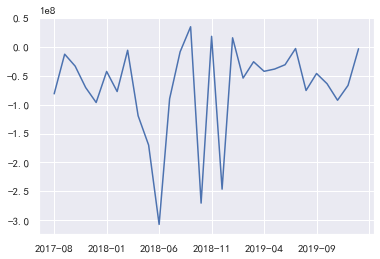

In [45]:
money_flow_monthly_df['利润'].plot()

## 企业E1的各项指标


In [46]:
month_cancel_sell = df_E1_sell[df_E1_sell['发票状态']=='作废发票'].groupby('开票月份').count()['企业代号']
month_neg_sell = df_E1_sell[df_E1_sell['金额']<0].groupby('开票月份').count()['企业代号']
month_cancel_buy = df_E1_buy[df_E1_buy['发票状态']=='作废发票'].groupby('开票月份').count()['企业代号']
month_neg_buy = df_E1_buy[df_E1_buy['金额']<0].groupby('开票月份').count()['企业代号']
month_bill = pd.concat([month_cancel_sell,month_neg_sell,month_cancel_buy,month_neg_buy], axis = 1).dropna()
month_bill.columns = ['进项作废发票数','进项负数发票数','出项作废发票数','出项负数发票数']

In [47]:
month_bill

,进项作废发票数,进项负数发票数,出项作废发票数,出项负数发票数
2017-08,9.0,14.0,3.0,6.0
2017-09,11.0,13.0,2.0,6.0
2017-10,10.0,16.0,5.0,5.0
2017-11,3.0,1.0,1.0,7.0
2017-12,4.0,2.0,1.0,3.0
2018-01,3.0,13.0,2.0,2.0
2018-02,1.0,1.0,3.0,1.0
2018-04,3.0,17.0,1.0,1.0
2018-11,6.0,5.0,1.0,5.0
2019-03,8.0,9.0,2.0,3.0


In [48]:
month_in_num = df_E1_sell.groupby('开票月份').count()['企业代号']
month_out_num = df_E1_buy.groupby('开票月份').count()['企业代号']
month_in_out = pd.concat([month_in_num, month_out_num], axis = 1).dropna()
month_in_out.columns = ['进项数','出项数']

money_flow_monthly_df = pd.concat([money_flow_monthly_df, month_in_out, month_bill], axis = 1)

money_flow_monthly_df

,购买金额,进项税额,购买价税合计,销售金额,销项税额,销售价税合计,利润,进项数,出项数,进项作废发票数,进项负数发票数,出项作废发票数,出项负数发票数
2017-08,2.383860e+08,40516776.01,2.789028e+08,1.688766e+08,28709027.42,1.975857e+08,-8.131715e+07,289.0,61,9.0,14.0,3.0,6.0
2017-09,2.537457e+08,43111063.96,2.968568e+08,2.429125e+08,41295121.56,2.842076e+08,-1.264921e+07,357.0,98,11.0,13.0,2.0,6.0
2017-10,1.705131e+08,28964633.63,1.994778e+08,1.420132e+08,24142237.48,1.661554e+08,-3.332236e+07,301.0,65,10.0,16.0,5.0,5.0
2017-11,2.581708e+08,43863405.69,3.020342e+08,1.979691e+08,33654745.81,2.316238e+08,-7.041040e+07,302.0,83,3.0,1.0,1.0,7.0
2017-12,1.657974e+08,28065578.84,1.938629e+08,8.341307e+07,14180222.13,9.759330e+07,-9.626964e+07,198.0,92,4.0,2.0,1.0,3.0
2018-01,1.250213e+08,21247414.01,1.462687e+08,8.863700e+07,15068291.04,1.037053e+08,-4.256342e+07,204.0,58,3.0,13.0,2.0,2.0
2018-02,1.563595e+08,26578614.50,1.829382e+08,9.027313e+07,15346432.91,1.056196e+08,-7.731859e+07,152.0,60,1.0,1.0,3.0,1.0
2018-03,2.488052e+08,42294093.11,2.910993e+08,2.437913e+08,41444520.43,2.852358e+08,-5.863511e+06,359.0,102,NaN,NaN,NaN,NaN
2018-04,2.599724e+08,44185319.33,3.041577e+08,1.579979e+08,26859638.76,1.848575e+08,-1.193002e+08,273.0,120,3.0,17.0,1.0,1.0
2018-05,3.512231e+08,57559809.30,4.087829e+08,2.054855e+08,33206920.30,2.386924e+08,-1.700905e+08,353.0,135,NaN,NaN,NaN,NaN


### 上述月均数据可以提取出企业进项总金额、企业销项总金额、企业总税额等指标.

In [49]:
money_flow_monthly_df.sum()

购买金额       5.964027e+09
进项税额       9.286664e+08
购买价税合计     6.892693e+09
销售金额       4.152994e+09
销项税额       6.458183e+08
销售价税合计     4.798812e+09
利润        -2.104933e+09
进项数        8.110000e+03
出项数        3.435000e+03
进项作废发票数    1.010000e+02
进项负数发票数    1.260000e+02
出项作废发票数    1.320000e+02
出项负数发票数    5.500000e+01
dtype: float64

### 企业波动情况

In [50]:
money_flow_monthly_df.var() #方差或者其它方法

购买金额       7.035564e+15
进项税额       2.138272e+14
购买价税合计     9.659891e+15
销售金额       4.128847e+15
销项税额       1.226743e+14
销售价税合计     5.649304e+15
利润         6.772311e+15
进项数        5.646230e+03
出项数        2.225293e+03
进项作废发票数    1.763810e+01
进项负数发票数    4.068571e+01
出项作废发票数    2.764571e+02
出项负数发票数    4.952381e+00
dtype: float64

### 企业类别，根据名称分类

不同领域企业类型对信贷评估可能存在影响，样本数目有限，类别可以分为三大类。
《财富中国》根据发达国家的行业界定与行业演变规则，对中国的行业进行了新分类。

In [51]:
types = ['机构组织', '农林牧渔','其它']
df[0]['企业名称'] # 可以人为分一下如果有必要。

0              ***电器销售有限公司
1              ***技术有限责任公司
2      ***电子(中国)有限公司***分公司
3              ***发展有限责任公司
4             ***供应链管理有限公司
              ...         
118                  ***药房
119            ***陈列广告有限公司
120       ***药业连锁有限公司***药店
121            ***商贸有限责任公司
122           ***创科技有限责任公司
Name: 企业名称, Length: 123, dtype: object

# calculate some index

In [54]:
import numpy as np
import matplotlib.pyplot as plt
def plot_and_get_dict(code,tmp_df):
    tmp_df.index = list(tmp_df.index)
    tmp_df['money_change'] = tmp_df['money_change'].cumsum()
    tmp_df['money_change'] = tmp_df['money_change'] +np.abs(tmp_df['money_change']).max()/(len(tmp_df)/350) *20
    names=tmp_df.columns
    #计算净值
    tmp_df[names[1]+'净值']=tmp_df[names[1]]/tmp_df[names[1]][0]
    #tmp_df[names[2]+'净值']=tmp_df[names[2]]/tmp_df[names[2]][0]
    rate = tmp_df[names[1]]/tmp_df[names[1]].shift(1)-1
    rate[np.isnan(rate)]=0.0
    tmp_df[names[1]+'涨跌幅']=rate
    #rate = tmp_df[names[2]]/tmp_df[names[2]].shift(1)-1
    rate[np.isnan(rate)]=0.0
    #tmp_df[names[2]+'涨跌幅']=rate

    #将上述股票在回测期间内的净值可视化
    tmp_df.index = tmp_df.iloc[:,0]
    #tmp_df[list(names[1:3])].plot(figsize=(16,7))
    #图标题
    #plt.title(names[1],fontsize=15)
    data_dict= {}
    data_dict['企业代号']=code
    #data_dict['参考指数']=names[2]
    data_dict['累计收益']=tmp_df[names[1]+'净值'][-1]-1
    data_dict['年化收益']=(data_dict['累计收益']+1)**(52/len(tmp_df))-1
    data_dict['标准差']=(tmp_df[names[1]+'涨跌幅']).std()*np.sqrt(52)
    data_dict['夏普比率']=data_dict['年化收益']/data_dict['标准差']
    data_dict['下侧波动率']=(tmp_df[tmp_df[names[1]+'涨跌幅']<0][names[1]+'涨跌幅']).std()
    data_dict['索提诺比率']=data_dict['年化收益']/data_dict['下侧波动率']
    data_dict['正收益周'] = len(tmp_df[tmp_df[names[1]+'涨跌幅']>0])
    data_dict['负收益周'] = len(tmp_df[tmp_df[names[1]+'涨跌幅']<0])
    data_dict['零收益周'] = len(tmp_df[tmp_df[names[1]+'涨跌幅']==0.0])
    data_dict['胜率']=data_dict['正收益周']/(data_dict['负收益周']+1)
    data_dict['盈亏比']=-tmp_df[tmp_df[names[1]+'涨跌幅']>0][names[1]+'涨跌幅'].sum()/data_dict['正收益周']*data_dict['负收益周']/tmp_df[tmp_df[names[1]+'涨跌幅']<0][names[1]+'涨跌幅'].sum()
    data_dict['最大回撤']=-((tmp_df[names[1]].cummax()-tmp_df[names[1]])/tmp_df[names[1]].cummax()).max()
    data_dict['收益回撤比']=-data_dict['年化收益']/(data_dict['最大回撤']+0.01)
    data_dict['最大上涨']=((tmp_df[names[1]]-tmp_df[names[1]].cummin())/tmp_df[names[1]].cummin()).max()
    data_dict['Calmar']=data_dict['年化收益']/(data_dict['最大回撤']+0.01)
    data_dict['交易周']=len(tmp_df)
    data_dict['周平均收益']=data_dict['累计收益']/data_dict['交易周']
    return data_dict
plot_and_get_dict('E1',money_flow_df.copy())

{'企业代号': 'E1',
 '累计收益': -0.13163468698249703,
 '年化收益': -0.007769263350309585,
 '标准差': 0.016727826574709805,
 '夏普比率': -0.46445145253093745,
 '下侧波动率': 0.0026122870926347783,
 '索提诺比率': -2.974123086323345,
 '正收益周': 232,
 '负收益周': 554,
 '零收益周': 155,
 '胜率': 0.418018018018018,
 '盈亏比': 1.6179155753850523,
 '最大回撤': -0.1445915940926641,
 '收益回撤比': -0.057724729413343424,
 '最大上涨': 0.01708372508191089,
 'Calmar': 0.057724729413343424,
 '交易周': 941,
 '周平均收益': -0.00013988808393464083}

In [55]:

plot_and_get_dict('E1',get_one_money_flow('E1',df))

{'企业代号': 'E1',
 '累计收益': -0.13149477873991333,
 '年化收益': -0.0077686534474635804,
 '标准差': 0.016717739990122892,
 '夏普比率': -0.4646951951671353,
 '下侧波动率': 0.0026114763167469877,
 '索提诺比率': -2.9748129047330143,
 '正收益周': 232,
 '负收益周': 553,
 '零收益周': 155,
 '胜率': 0.4187725631768953,
 '盈亏比': 1.614987041085666,
 '最大回撤': -0.14443973897156,
 '收益回撤比': -0.05778539520302845,
 '最大上涨': 0.017063533902517632,
 'Calmar': 0.05778539520302845,
 '交易周': 940,
 '周平均收益': -0.0001398880624892695}

In [57]:
feature_finance_list = []
for code in df[0]['企业代号']:
    tmp_dict = plot_and_get_dict(code,get_one_money_flow(code,df))
    tmp_dict.update(get_one_ratio(code,df))
    feature_finance_list.append(tmp_dict)
feature_finance_df = pd.DataFrame(feature_finance_list)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


In [58]:
feature_finance_df

,企业代号,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,最大回撤,收益回撤比,最大上涨,Calmar,交易周,周平均收益,第1档税率比例,第2档税率比例,第3档税率比例,第4档税率比例
0,E1,-0.131495,-0.007769,0.016718,-0.464695,0.002611,-2.974813,232,553,155,...,-0.144440,-0.057785,0.017064,0.057785,940,-0.000140,0.000302,0.000405,0.746664,0.252629
1,E2,0.162691,0.006881,0.002542,2.706953,0.000086,80.163611,584,505,54,...,-0.001050,-0.768870,0.162741,0.768870,1143,0.000142,0.722981,0.144787,0.105275,0.026956
2,E3,0.163301,0.006905,0.003632,1.901220,0.000110,62.738328,359,673,111,...,-0.001340,-0.797407,0.163308,0.797407,1143,0.000143,0.419064,0.553377,0.011722,0.015837
3,E4,0.161037,0.006882,0.006595,1.043584,0.000362,19.025541,105,289,738,...,-0.005683,-1.594359,0.161286,1.594359,1132,0.000142,0.003702,0.002804,0.777037,0.216457
4,E5,0.085929,0.003828,0.072139,0.053062,0.009010,0.424846,113,450,559,...,-0.157141,0.026015,0.252916,-0.026015,1122,0.000077,0.002879,0.034738,0.690120,0.272264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,E119,-0.137143,-0.007958,0.006559,-1.213385,0.001947,-4.087184,14,145,801,...,-0.137143,-0.062592,0.008187,0.062592,960,-0.000143,0.015432,0.096054,0.434645,0.453865
119,E120,0.116004,0.006976,0.024781,0.281502,0.003427,2.035657,6,30,785,...,-0.022263,0.568834,0.130651,-0.568834,821,0.000141,0.081493,0.777337,0.111697,0.029438
120,E121,-0.135971,-0.007910,0.008196,-0.965103,0.003927,-2.014017,101,38,818,...,-0.136908,-0.062327,0.002720,0.062327,957,-0.000142,0.008879,0.010134,0.980986,0.000000
121,E122,0.100427,0.004989,0.021257,0.234688,0.008510,0.586224,65,43,892,...,-0.051738,0.119526,0.142857,-0.119526,1000,0.000100,0.101942,0.862383,0.035655,0.000000


In [59]:
feature_finance_df.to_csv('../data/zhibiao_finance.csv',index=False)

In [61]:
import numpy as np
import pandas as pd
from math import log,sqrt
import operator


# 提高随机森林的精度：指标选取，数据处理，参数选择

# 数据处理
df1 = pd.read_csv("../data/zhibiao3.csv")
df2 = pd.read_csv("../data/zhibiao_finance.csv")

# L2正则法
for i in ["shangyoutui", "xiayoutui"]:
    df1[i] = (df1[i] - df1[i].mean())/sqrt(sum(df1[i]*df1[i]))
for i in ["company", "revenue", "profit", "profit_rate", "shangyouji", "xiayouji","shangyoudingdan","xiayoudingdan"]:
    df1[i] = (df1[i] - df1[i].mean())/sqrt(sum(df1[i]*df1[i]))
feature_list =list(df2.columns)
for feature in feature_list[1:]:
    df2[feature] =(df2[feature] - df2[feature].mean())/df2[feature].std()
df2.columns = ['Idex'] + feature_list[1:]
df1_all = pd.merge(df2,df1,how='inner',on='Idex')
df1_all

,Idex,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,J,L,M,N,O,Q,R,S,P,label
0,E1,-2.943891,-3.174125,0.043597,-1.419503,-0.062530,-0.198030,0.561843,1.294007,-1.684735,...,0,0,0,0,0,0,0,0,0,1
1,E2,0.730062,0.476873,-0.894448,2.587012,-0.572813,-0.106339,2.731831,1.081116,-2.056517,...,0,0,1,0,0,0,0,0,0,1
2,E3,0.737673,0.482856,-0.822323,1.569188,-0.567919,-0.125557,1.344765,1.826235,-1.846699,...,0,0,0,0,0,0,0,0,0,3
3,E4,0.709400,0.477180,-0.626251,0.485797,-0.517068,-0.173767,-0.221079,0.123105,0.461293,...,0,0,1,0,0,0,0,0,0,3
4,E5,-0.228587,-0.284084,3.710999,-0.765458,1.230237,-0.194281,-0.171761,0.837178,-0.197607,...,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,E119,-3.014428,-3.221334,-0.628664,-2.365269,-0.196765,-0.199257,-0.782070,-0.515569,0.693197,...,0,0,0,0,0,1,0,0,0,4
119,E120,0.147009,0.500430,0.577138,-0.476886,0.102199,-0.192504,-0.831388,-1.025621,0.634301,...,0,1,0,0,0,0,0,0,0,4
120,E121,-2.999789,-3.209289,-0.520327,-2.051633,0.203331,-0.196971,-0.245737,-0.990139,0.755774,...,0,0,0,0,0,0,0,0,0,4
121,E122,-0.047526,0.005221,0.343959,-0.536023,1.129199,-0.194103,-0.467668,-0.967963,1.028169,...,0,0,0,0,0,0,0,0,0,4


In [62]:
df2

,Idex,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,最大回撤,收益回撤比,最大上涨,Calmar,交易周,周平均收益,第1档税率比例,第2档税率比例,第3档税率比例,第4档税率比例
0,E1,-2.943891,-3.174125,0.043597,-1.419503,-0.062530,-0.198030,0.561843,1.294007,-1.684735,...,-1.734823,0.087891,-2.308063,-0.087891,-0.474280,-3.123064,-0.870791,-0.755446,1.440303,0.296728
1,E2,0.730062,0.476873,-0.894448,2.587012,-0.572813,-0.106339,2.731831,1.081116,-2.056517,...,0.730151,0.063053,0.278769,-0.063053,0.813066,0.507249,1.450090,-0.284530,-0.655150,-0.783170
2,E3,0.737673,0.482856,-0.822323,1.569188,-0.567919,-0.125557,1.344765,1.826235,-1.846699,...,0.725163,0.062056,0.288852,-0.062056,0.813066,0.514108,0.474060,1.048120,-0.960794,-0.836377
3,E4,0.709400,0.477180,-0.626251,0.485797,-0.517068,-0.173767,-0.221079,0.123105,0.461293,...,0.650505,0.034219,0.252934,-0.034219,0.743308,0.506240,-0.859870,-0.747622,1.539532,0.123636
4,E5,-0.228587,-0.284084,3.710999,-0.765458,1.230237,-0.194281,-0.171761,0.837178,-0.197607,...,-1.953174,0.090819,1.880051,-0.090819,0.679892,-0.338525,-0.862514,-0.643467,1.255570,0.390682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,E119,-3.014428,-3.221334,-0.628664,-2.365269,-0.196765,-0.199257,-0.782070,-0.515569,0.693197,...,-1.609384,0.087724,-2.465684,-0.087724,-0.347448,-3.161256,-0.822201,-0.443479,0.420918,1.259687
119,E120,0.147009,0.500430,0.577138,-0.476886,0.102199,-0.192504,-0.831388,-1.025621,0.634301,...,0.365482,0.109779,-0.291050,-0.109779,-1.228931,0.493860,-0.610046,1.778583,-0.634170,-0.771293
120,E121,-2.999789,-3.209289,-0.520327,-2.051633,0.203331,-0.196971,-0.245737,-0.990139,0.755774,...,-1.605350,0.087733,-2.562769,-0.087733,-0.366473,-3.151261,-0.843244,-0.723714,2.205846,-0.912160
121,E122,-0.047526,0.005221,0.343959,-0.536023,1.129199,-0.194103,-0.467668,-0.967963,1.028169,...,-0.141204,0.094085,-0.074307,-0.094085,-0.093784,-0.031846,-0.544373,2.055969,-0.882604,-0.912160


In [63]:
df1_all =df1_all.fillna(0.0)

In [64]:
data = df1_all.values[:,1:].tolist()
data_full= data[:]
labels=df1_all.columns.values[1:-1].tolist()
labels_full=labels[:]

# 随机森林
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
x, y = df1_all.iloc[:, 1:-1].values, df1_all.iloc[:, -1].values

0.6923076923076923 [0.57142857 0.57142857 0.75       1.        ] 0.7232142857142858


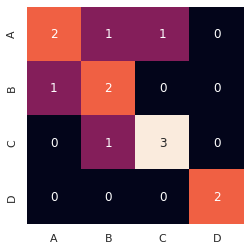

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10,stratify=y, random_state = 7)
feat_labels = df1_all.columns[1:]
forest = RandomForestClassifier(max_features=17,n_estimators=40, max_depth=3, oob_score=True, min_samples_leaf = 5, random_state=99, n_jobs=-1)
forest.fit(x_train, y_train)
ypred = forest.predict(x_test)

# 混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A","B","C","D"], yticklabels=["A","B","C","D"])
plt.savefig('../figure/mat.png')
print(accuracy_score(y_test, ypred),f1_score(y_test,ypred,average=None),f1_score(y_test,ypred,average='macro'))

In [66]:
df1_all.columns

Index(['Idex', '累计收益', '年化收益', '标准差', '夏普比率', '下侧波动率', '索提诺比率', '正收益周', '负收益周',
       '零收益周', '胜率', '盈亏比', '最大回撤', '收益回撤比', '最大上涨', 'Calmar', '交易周', '周平均收益',
       '第1档税率比例', '第2档税率比例', '第3档税率比例', '第4档税率比例', 'company', 'revenue',
       'profit', 'profit_rate', 'shangyoutui', 'xiayoutui', 'shangyoudingdan',
       'xiayoudingdan', 'shangyouji', 'xiayouji', 'stable', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'Q', 'R', 'S', 'P',
       'label'],
      dtype='object')

In [304]:
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(random_state=0),svm.SVC(decision_function_shape='ovr'),tree.DecisionTreeClassifier(random_state=2),MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)]
for model in models:
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    print(accuracy_score(y_test, ypred),f1_score(y_test,ypred,average=None),f1_score(y_test,ypred,average='macro'))

0.38461538461538464 [0.57142857 0.44444444 0.         0.4       ] 0.35396825396825404
0.3076923076923077 [0.4        0.36363636 0.         0.5       ] 0.3159090909090909
0.5384615384615384 [0.4        0.         0.72727273 1.        ] 0.5318181818181819
0.23076923076923078 [0.33333333 0.22222222 0.         0.5       ] 0.2638888888888889


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


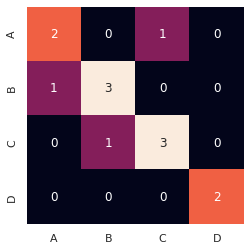

0.7692307692307693 [0.66666667 0.75       0.75       1.        ] 0.7916666666666666


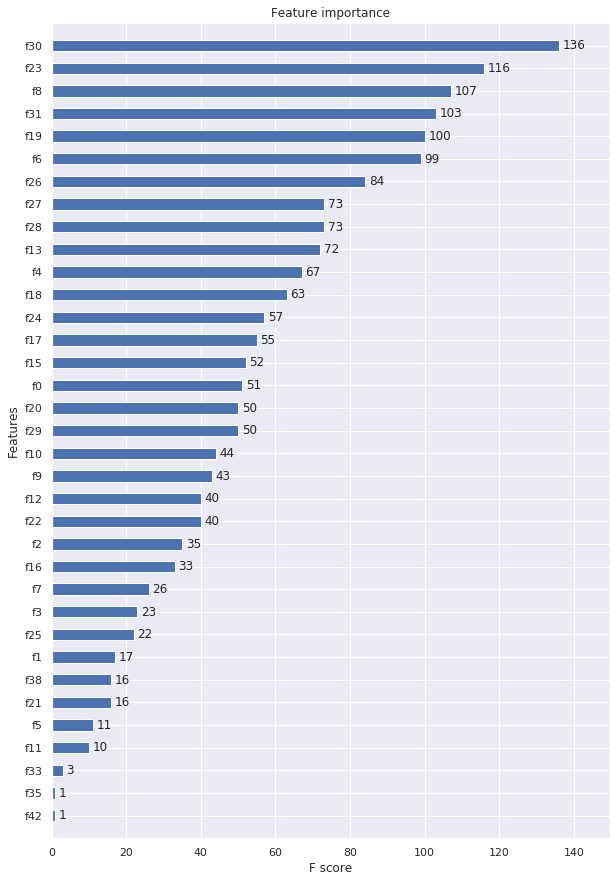

In [67]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=4,learning_rate=0.15,n_jobs=8, random_state=10)
model.fit(x_train,y_train)            # 训练模型（训练集）
ypred = model.predict(x_test)
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A","B","C","D"], yticklabels=["A","B","C","D"])
plt.savefig('../figure/mat2.png')
plt.show()
print(accuracy_score(y_test, ypred),f1_score(y_test,ypred,average=None),f1_score(y_test,ypred,average='macro'))
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,15))
plot_importance(model,height=0.5,max_num_features=64,ax=ax)
plt.savefig('../figure/feature_importance.png')
plt.show()

In [71]:
probability_df = pd.DataFrame(model.predict_proba(x))
probability_df['code'] = df1_all['Idex']
probability_df.to_csv('../data/probability.csv')

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


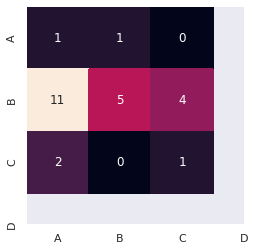

0.28
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122] TEST: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


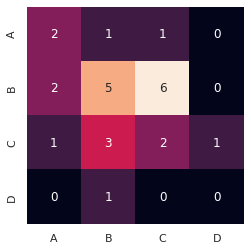

0.36
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]


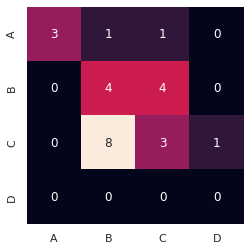

0.4
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122] TEST: [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]


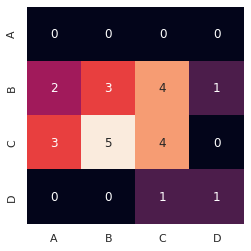

0.3333333333333333
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98] TEST: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122]


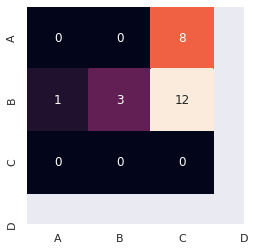

0.125


In [290]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(x)

print(kf)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    feat_labels = df1_all.columns[1:]
    forest = RandomForestClassifier(max_features=17,n_estimators=40, max_depth=3, oob_score=True, min_samples_leaf = 5, random_state=99, n_jobs=-1)
    forest.fit(x_train, y_train)
    ypred = forest.predict(x_test)

    # 混淆矩阵
    mat = confusion_matrix(y_test, ypred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A","B","C","D"], yticklabels=["A","B","C","D"])
    plt.show()
    print(accuracy_score(y_test, ypred))

In [257]:





# 调参
from sklearn.model_selection import GridSearchCV
# 建立n_estimators为45的随机森林
rfc = RandomForestClassifier(max_depth=3)

# 用网格搜索调整max_depth
param_grid = {'max_features':np.arange(1,20),'n_estimators':np.arange(40,60,10),'random_state':np.arange(30,150,20)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(x_train, y_train)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_features': 10, 'n_estimators': 50, 'random_state': 70} 0.5545454545454545


In [ ]:
df_attach2 = []
for i in range(3):
    df_attach2.append(pd.read_excel('../data/附件2：302家无信贷记录企业的相关数据(1).xlsx',sheet_name=i))

In [330]:
pd.read_excel('../data/附件2：302家无信贷记录企业的相关数据(1).xlsx')

,企业代号,企业名称
0,E124,个体经营E124
1,E125,个体经营E125
2,E126,个体经营E126
3,E127,个体经营E127
4,E128,个体经营E128
...,...,...
297,E421,***保温材料有限公司
298,E422,***童装店
299,E423,***通风设备有限公司
300,E424,***贸易有限公司


In [332]:
df_attach2

[     企业代号         企业名称
 0    E124    个体经营E124 
 1    E125    个体经营E125 
 2    E126    个体经营E126 
 3    E127    个体经营E127 
 4    E128    个体经营E128 
 ..    ...          ...
 297  E421  ***保温材料有限公司
 298  E422       ***童装店
 299  E423  ***通风设备有限公司
 300  E424    ***贸易有限公司
 301  E425    ***商贸有限公司
 
 [302 rows x 2 columns],
         企业代号      发票号码                开票日期  购方单位代号         金额        税额  \
 0       E124  15212483 2017-09-01 11:58:43  D00585  839350.55  92328.56   
 1       E124  15212484 2017-09-01 11:59:20  D00585  900900.90  99099.10   
 2       E124  15212485 2017-09-01 11:59:51  D00585  900900.90  99099.10   
 3       E124  15212486 2017-09-01 12:00:45  D00585  697365.74  76710.23   
 4       E124   6089615 2017-09-05 10:58:38  D00108  726216.22  79883.78   
 ...      ...       ...                 ...     ...        ...       ...   
 330830  E425  21803468 2018-04-03 00:00:00  D21446    9000.00    270.00   
 330831  E425  21803469 2018-04-03 00:00:00  D21446    5155.34    154.66   
 

In [333]:
len(df_attach2)

3

In [334]:
feature_finance_list2 = []
for code in df_attach2[0]['企业代号']:
    tmp_dict = plot_and_get_dict(code,get_one_money_flow(code,df_attach2))
    tmp_dict.update(get_one_ratio(code,df_attach2))
    feature_finance_list2.append(tmp_dict)
feature_finance_df2 = pd.DataFrame(feature_finance_list2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


In [335]:
1

1

In [336]:
feature_finance_df2

,企业代号,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,最大回撤,收益回撤比,最大上涨,Calmar,交易周,周平均收益,第1档税率比例,第2档税率比例,第3档税率比例,第4档税率比例
0,E124,0.106853,0.007083,0.008264,0.857023,0.001725,4.104716,727,4,17,...,-0.004274,-1.236991,0.106853,1.236991,748,0.000143,0.132348,5.946140e-01,0.000000,0.273038
1,E125,-0.022238,-0.001090,0.026514,-0.041121,0.004938,-0.220791,728,232,112,...,-0.153354,-0.007606,0.162903,0.007606,1072,-0.000021,0.140621,5.869164e-01,0.000000,0.272463
2,E126,-0.148993,-0.007803,0.003945,-1.978052,0.000791,-9.868616,157,367,547,...,-0.149595,-0.055895,0.002346,0.055895,1071,-0.000139,0.966898,6.760922e-07,0.024853,0.008248
3,E127,-0.153143,-0.008031,0.003599,-2.231310,0.000872,-9.211019,473,219,380,...,-0.153143,-0.056102,0.000226,0.056102,1072,-0.000143,0.999722,2.777748e-04,0.000000,0.000000
4,E128,-0.150574,-0.007996,0.006760,-1.182967,0.002654,-3.013417,735,92,230,...,-0.150581,-0.056881,0.000963,0.056881,1057,-0.000142,0.934540,9.212862e-03,0.000000,0.056247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,-0.113533,-0.006247,0.018749,-0.333186,0.026331,-0.237244,17,5,978,...,-0.116164,-0.058842,0.018871,0.058842,1000,-0.000114,0.999996,0.000000e+00,0.000000,0.000000
298,E422,-0.079857,-0.007712,0.011221,-0.687299,0.007837,-0.984043,2,16,541,...,-0.079857,-0.110398,0.000857,0.110398,559,-0.000143,0.955433,4.453166e-02,0.000000,0.000000
299,E423,0.040669,0.002201,0.046229,0.047603,0.050967,0.043177,17,4,922,...,-0.145500,0.016241,0.184888,-0.016241,943,0.000043,0.999987,0.000000e+00,0.000000,0.000000
300,E424,0.105437,0.006993,0.019066,0.366771,0.009680,0.722421,23,20,705,...,-0.043630,0.207937,0.130109,-0.207937,748,0.000141,0.894128,1.058608e-01,0.000000,0.000000


In [341]:
feature_finance_df2.to_csv('../data/zhibiao_finance2.csv',index=False)

In [348]:
df1_modi_all

,Idex,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,J,L,M,N,O,Q,R,S,P,label
0,E124,2.674095,3.107551,-0.542858,1.792148,-0.589476,0.635754,1.857363,-0.945791,-2.174227,...,0,0,0,0,0,0,0,0,1,1.0
1,E125,1.073370,1.155941,0.597797,0.717231,-0.199759,0.164471,1.861620,0.686865,-1.818384,...,0,0,0,0,0,0,0,0,1,1.0
2,E126,-0.498391,-0.446919,-0.812837,-1.600928,-0.702878,-0.886701,-0.569035,1.653570,-0.188997,...,0,0,0,0,0,0,0,0,1,3.0
3,E127,-0.549841,-0.501353,-0.834435,-1.904033,-0.693028,-0.815053,0.776126,0.593775,-0.814532,...,0,0,0,0,0,0,0,0,1,3.0
4,E128,-0.517987,-0.493162,-0.636899,-0.649354,-0.476890,-0.139797,1.891418,-0.315643,-1.376389,...,0,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,-0.058679,-0.075430,0.112474,0.367681,2.395425,0.162678,-1.164993,-0.938631,1.425406,...,0,0,0,0,0,0,0,0,0,0.0
298,E422,0.358894,-0.425289,-0.358059,-0.056129,0.151920,0.081311,-1.228845,-0.859862,-0.211472,...,0,0,0,0,0,0,0,0,0,0.0
299,E423,1.853410,1.941781,1.829987,0.823417,5.383958,0.193232,-1.164993,-0.945791,1.215646,...,0,0,0,0,0,0,0,0,0,0.0
300,E424,2.656527,3.086140,0.132288,1.205403,0.375454,0.267238,-1.139452,-0.831219,0.402826,...,0,0,0,0,0,0,0,0,0,0.0


In [349]:
df2_modi

,Idex,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,最大回撤,收益回撤比,最大上涨,Calmar,交易周,周平均收益,第1档税率比例,第2档税率比例,第3档税率比例,第4档税率比例
0,E124,2.674095,3.107551,-0.542858,1.792148,-0.589476,0.635754,1.857363,-0.945791,-2.174227,...,3.172334,-2.095109,0.868027,2.095109,-2.006125,3.137665,-0.576752,1.340912,-0.740036,0.430874
1,E125,1.073370,1.155941,0.597797,0.717231,-0.199759,0.164471,1.861620,0.686865,-1.818384,...,-0.261367,0.208391,1.718865,-0.208391,0.347085,1.066289,-0.557707,1.315322,-0.740036,0.428003
2,E126,-0.498391,-0.446919,-0.812837,-1.600928,-0.702878,-0.886701,-0.569035,1.653570,-0.188997,...,-0.174795,0.117911,-0.718420,-0.117911,0.339822,-0.432475,1.344517,-0.635870,-0.663132,-0.890508
3,E127,-0.549841,-0.501353,-0.834435,-1.904033,-0.693028,-0.815053,0.776126,0.593775,-0.814532,...,-0.256504,0.117522,-0.750606,-0.117522,0.347085,-0.479839,1.420082,-0.634949,-0.740036,-0.931665
4,E128,-0.517987,-0.493162,-0.636899,-0.649354,-0.476890,-0.139797,1.891418,-0.315643,-1.376389,...,-0.197496,0.116064,-0.739412,-0.116064,0.238140,-0.474736,1.270023,-0.605244,-0.740036,-0.650976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,-0.058679,-0.075430,0.112474,0.367681,2.395425,0.162678,-1.164993,-0.938631,1.425406,...,0.595212,0.112388,-0.467563,-0.112388,-0.175851,-0.108549,1.420713,-0.635872,-0.740036,-0.931665
298,E422,0.358894,-0.425289,-0.358059,-0.056129,0.151920,0.081311,-1.228845,-0.859862,-0.211472,...,1.431461,0.015788,-0.741027,-0.015788,-3.378831,-0.479843,1.318122,-0.487827,-0.740036,-0.931665
299,E423,1.853410,1.941781,1.829987,0.823417,5.383958,0.193232,-1.164993,-0.945791,1.215646,...,-0.080460,0.253071,2.052612,-0.253071,-0.589842,1.874997,1.420693,-0.635872,-0.740036,-0.931665
300,E424,2.656527,3.086140,0.132288,1.205403,0.375454,0.267238,-1.139452,-0.831219,0.402826,...,2.265870,0.612253,1.221045,-0.612253,-2.006125,3.113684,1.176987,-0.283940,-0.740036,-0.931665


In [350]:
df1_modi

,Idex,company,revenue,profit,profit_rate,shangyoutui,xiayoutui,shangyoudingdan,xiayoudingdan,shangyouji,...,J,L,M,N,O,Q,R,S,P,label
0,E124,-0.048890,0.387209,-0.060079,0.002170,0.117424,0.011128,0.001043,0.337664,-0.029457,...,0,0,0,0,0,0,0,0,1,1.0
1,E125,-0.048890,0.486320,-0.032527,0.002341,0.117987,0.005139,0.007526,0.398193,-0.035193,...,0,0,0,0,0,0,0,0,1,1.0
2,E126,-0.048890,0.267097,0.409448,0.005875,0.001312,0.012750,0.005318,-0.018130,0.007337,...,0,0,0,0,0,0,0,0,1,3.0
3,E127,-0.048890,0.298878,0.551862,0.006575,-0.021621,-0.032571,0.067962,0.004808,-0.026735,...,0,0,0,0,0,0,0,0,1,3.0
4,E128,-0.048890,0.092682,0.180175,0.006397,-0.007171,-0.019907,0.004412,0.047183,-0.038552,...,0,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,0.018838,-0.026712,-0.020965,0.006082,-0.043663,-0.031646,-0.021914,-0.030467,0.069022,...,0,0,0,0,0,0,0,0,0,NaN
298,E422,-0.048890,-0.026814,-0.021120,0.006454,-0.043663,-0.012616,-0.021937,-0.030870,0.052105,...,0,0,0,0,0,0,0,0,0,NaN
299,E423,0.018838,-0.026790,-0.021123,0.003659,0.010694,-0.000168,-0.022425,-0.030467,0.025023,...,0,0,0,0,0,0,0,0,0,NaN
300,E424,0.018838,-0.026786,-0.021272,-0.005078,-0.043663,0.012376,-0.021798,-0.030316,0.059464,...,0,0,0,0,0,0,0,0,0,NaN


In [342]:
df1_modi = pd.read_csv("../data/zhibiao2(1).csv")
df2_modi = pd.read_csv("../data/zhibiao_finance2.csv")

# L2正则法
for i in ["shangyoutui", "xiayoutui"]:
    df1_modi[i] = (df1_modi[i] - df1_modi[i].mean())/sqrt(sum(df1_modi[i]*df1_modi[i]))
for i in ["company", "revenue", "profit", "profit_rate", "shangyouji", "xiayouji","shangyoudingdan","xiayoudingdan"]:
    df1_modi[i] = (df1_modi[i] - df1_modi[i].mean())/sqrt(sum(df1_modi[i]*df1_modi[i]))
feature_list =list(df2_modi.columns)
for feature in feature_list[1:]:
    df2_modi[feature] =(df2_modi[feature] - df2_modi[feature].mean())/df2_modi[feature].std()
df2_modi.columns = ['Idex'] + feature_list[1:]
df1_modi_all = pd.merge(df2_modi,df1_modi,how='inner',on='Idex')

In [351]:
df1_modi_all =df1_modi_all.fillna(0.0)

# 随机森林
x2 = df1_modi_all.iloc[:, 1:-1].values

In [352]:
ypred2 = model.predict(x2)

In [353]:
x2.shape

(302, 49)

In [355]:
ypred2.shape

(302,)

In [357]:
df1_modi_all['label'] = ypred2

In [356]:
ypred2

array([2, 2, 2, 2, 3, 1, 2, 1, 1, 3, 1, 4, 3, 3, 1, 2, 4, 1, 2, 2, 4, 3,
       3, 1, 1, 4, 1, 4, 2, 4, 2, 3, 2, 2, 3, 1, 4, 4, 2, 3, 1, 1, 4, 2,
       4, 1, 2, 2, 4, 1, 1, 2, 1, 1, 4, 3, 1, 2, 2, 2, 3, 4, 2, 3, 1, 3,
       4, 2, 3, 1, 2, 1, 1, 1, 2, 4, 2, 2, 2, 3, 1, 1, 3, 2, 1, 1, 4, 4,
       4, 3, 1, 4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 4, 2, 3, 3,
       1, 1, 4, 3, 2, 4, 3, 4, 2, 3, 3, 4, 2, 4, 2, 2, 1, 2, 2, 2, 4, 3,
       4, 4, 2, 3, 2, 4, 3, 4, 2, 2, 4, 3, 4, 4, 4, 3, 4, 2, 4, 4, 2, 4,
       2, 3, 4, 2, 4, 4, 4, 3, 4, 2, 4, 3, 3, 4, 4, 4, 1, 1, 2, 4, 4, 2,
       2, 3, 4, 4, 2, 4, 3, 3, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4,
       2, 3, 2, 2, 4, 4, 4, 4, 2, 3, 3, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 3, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1, 3, 4, 4, 3,

In [358]:
df1_modi_all

,Idex,累计收益,年化收益,标准差,夏普比率,下侧波动率,索提诺比率,正收益周,负收益周,零收益周,...,J,L,M,N,O,Q,R,S,P,label
0,E124,2.674095,3.107551,-0.542858,1.792148,-0.589476,0.635754,1.857363,-0.945791,-2.174227,...,0,0,0,0,0,0,0,0,1,2
1,E125,1.073370,1.155941,0.597797,0.717231,-0.199759,0.164471,1.861620,0.686865,-1.818384,...,0,0,0,0,0,0,0,0,1,2
2,E126,-0.498391,-0.446919,-0.812837,-1.600928,-0.702878,-0.886701,-0.569035,1.653570,-0.188997,...,0,0,0,0,0,0,0,0,1,2
3,E127,-0.549841,-0.501353,-0.834435,-1.904033,-0.693028,-0.815053,0.776126,0.593775,-0.814532,...,0,0,0,0,0,0,0,0,1,2
4,E128,-0.517987,-0.493162,-0.636899,-0.649354,-0.476890,-0.139797,1.891418,-0.315643,-1.376389,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,-0.058679,-0.075430,0.112474,0.367681,2.395425,0.162678,-1.164993,-0.938631,1.425406,...,0,0,0,0,0,0,0,0,0,3
298,E422,0.358894,-0.425289,-0.358059,-0.056129,0.151920,0.081311,-1.228845,-0.859862,-0.211472,...,0,0,0,0,0,0,0,0,0,4
299,E423,1.853410,1.941781,1.829987,0.823417,5.383958,0.193232,-1.164993,-0.945791,1.215646,...,0,0,0,0,0,0,0,0,0,4
300,E424,2.656527,3.086140,0.132288,1.205403,0.375454,0.267238,-1.139452,-0.831219,0.402826,...,0,0,0,0,0,0,0,0,0,3


In [359]:
df1_modi_all.to_csv('../data/label_pred.csv',index=False,encoding='utf-8-sig')

# 判断一个时期现金流是否出现异常波动

In [360]:
money_flow_dict = {}
for code in df_attach2[0]['企业代号']:
    money_flow_dict[code] = get_one_money_flow(code,df_attach2)
money_flow_dict

{'E124':                   date  money_change
 date                                
 2017-09-02  2017-09-02        188.00
 2017-09-03  2017-09-03          0.00
 2017-09-04  2017-09-04        569.00
 2017-09-05  2017-09-05        488.00
 2017-09-06  2017-09-06        523.00
 ...                ...           ...
 2019-09-15  2019-09-15       3210.00
 2019-09-16  2019-09-16       4710.00
 2019-09-17  2019-09-17        670.00
 2019-09-18  2019-09-18       6198.21
 2019-09-19  2019-09-19        758.00
 
 [748 rows x 2 columns],
 'E125':                   date  money_change
 date                                
 2017-01-04  2017-01-04     115500.00
 2017-01-05  2017-01-05          0.00
 2017-01-06  2017-01-06          0.00
 2017-01-07  2017-01-07          0.00
 2017-01-08  2017-01-08          0.00
 ...                ...           ...
 2019-12-07  2019-12-07     747422.54
 2019-12-08  2019-12-08     146084.40
 2019-12-09  2019-12-09    5862426.58
 2019-12-10  2019-12-10    4737874.62
 2019-1

In [384]:
def get_event_score(event_start,event_end,money_flow_df):
    test_df = money_flow_df.copy()
#     event_start = '2019-01-10'
#     event_end = '2019-02-20'
    test_df.index =pd.to_datetime(test_df.index)
    test_df['date'] = pd.to_datetime(test_df['date'])
    event_start = pd.to_datetime(event_start)
    event_end = pd.to_datetime(event_end)
#date = (pd.to_datetime(start_date)+timedelta(i)).strftime('%Y-%m-%d')
    partial_df = test_df[test_df['date'] > event_start]['money_change']
    score = partial_df[partial_df < 0].std()/(test_df['money_change'].std()+1)
    return score

In [365]:
# test_df = money_flow_dict['E124'].copy()

In [391]:
score_list = []
event_dict = {'供给侧改革':('2017-01-01','2018-01-01'),'中美贸易冲突':('2018-10-1','2019-02-20'),'科创板':('2019-07-01','2019-12-31'),'新冠疫情':('2020-01-20','2020-03-01')}
for code,money_flow_df in money_flow_dict.items():
    tmp_dict ={'公司代号':code}
    for event,time_range in event_dict.items():
        tmp_dict[event] = get_event_score(*time_range,money_flow_df)
    score_list.append(tmp_dict)

In [394]:
score_df = pd.DataFrame(score_list)
score_df

,公司代号,供给侧改革,中美贸易冲突,科创板,新冠疫情
0,E124,1.515017,1.228924,NaN,NaN
1,E125,1.347016,1.468474,1.587508,NaN
2,E126,1.450000,1.627502,1.593611,NaN
3,E127,1.759944,1.252971,1.017203,NaN
4,E128,2.814248,3.222446,1.682626,NaN
...,...,...,...,...,...
297,E421,8.608150,3.047739,NaN,NaN
298,E422,5.000741,5.000741,8.601929,NaN
299,E423,8.731661,NaN,NaN,NaN
300,E424,3.678447,0.221529,0.285693,NaN


In [408]:
score_df['大类'] = pd.read_excel('../data/行业分类.xlsx',header=None,names=['大类'])['大类']

In [409]:
score_df

,公司代号,供给侧改革,中美贸易冲突,科创板,新冠疫情,大类
0,E124,1.515017,1.228924,NaN,NaN,P
1,E125,1.347016,1.468474,1.587508,NaN,P
2,E126,1.450000,1.627502,1.593611,NaN,P
3,E127,1.759944,1.252971,1.017203,NaN,P
4,E128,2.814248,3.222446,1.682626,NaN,P
...,...,...,...,...,...,...
297,E421,8.608150,3.047739,NaN,NaN,C
298,E422,5.000741,5.000741,8.601929,NaN,H
299,E423,8.731661,NaN,NaN,NaN,C
300,E424,3.678447,0.221529,0.285693,NaN,H


In [383]:
score

1.2289236815931237

# 画箱线图和进行统计排序分析

In [410]:

score_plot_list = []
for i in range(len(score_df)):
    data_dict = {'公司代号':score_df.loc[i,'公司代号'],'行业类别':score_df.loc[i,'大类']}
    for name in event_dict.keys():
        tmp_dict = data_dict.copy()
        tmp_dict['事件'] = name
        tmp_dict['下行波动倍率'] = score_df.loc[i,name]
        score_plot_list.append(tmp_dict)

In [438]:
score_plot_df = pd.DataFrame(score_plot_list)
score_plot_df.to_csv('../data/score_plot_df.csv',index=False)

In [4]:
import pandas as pd
score_plot_df= pd.read_csv('../data/score_plot_df.csv')

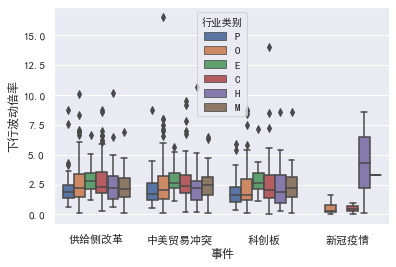

In [9]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
font_path = '/usr/share/fonts/chinese/truetype/simhei.ttf'
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
# plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
myfont = fm.FontProperties(fname=font_path)
sns.set(font=myfont.get_name())
import matplotlib
# matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False 
sns.boxplot(x='事件', y='下行波动倍率', hue='行业类别', data = score_plot_df)
plt.savefig('../figure/boxplot.png')